# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print (weather_api_key)


3deb82a390883e56a802d2bd5b4f4a48


## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# why is is lat_lng in lat_lngS?
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# lat_lngs=list(lat_lngs)
print(cities)
# print(lat_lngs)

['mataura', 'barrow', 'mys shmidta', 'iqaluit', 'kavieng', 'leningradskiy', 'georgetown', 'poum', 'benghazi', 'nieuw amsterdam', 'albany', 'puerto ayora', 'carnarvon', 'levittown', 'hilo', 'mar del plata', 'atuona', 'rikitea', 'astipalaia', 'nikolskoye', 'souillac', 'sioux lookout', 'diego de almagro', 'kisangani', 'rungata', 'amderma', 'cape town', 'avarua', 'olafsvik', 'durg', 'vaini', 'dabakala', 'punta arenas', 'busselton', 'alta floresta', 'mokrousovo', 'torbay', 'yellowknife', 'dali', 'nizhneyansk', 'kambove', 'chuy', 'ucluelet', 'saint-philippe', 'saleaula', 'soe', 'carballo', 'alofi', 'kazerun', 'kapaa', 'high level', 'raahe', 'bac lieu', 'ushuaia', 'pilar', 'anadyr', 'aklavik', 'new norfolk', 'chota', 'bredasdorp', 'batagay', 'ventimiglia', 'hobart', 'illoqqortoormiut', 'haibowan', 'butaritari', 'hithadhoo', 'tasiilaq', 'naze', 'stornoway', 'gabu', 'maarianhamina', 'provideniya', 'esperance', 'mamali', 'bathsheba', 'rawson', 'saldanha', 'sentyabrskiy', 'awjilah', 'lavrentiya',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
lst=[] 

# record = 1
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record=1
for city in cities:
    
    
    
        
    #print(city)
#     print(response)
#     print(response["coord"]["lat"])
    try:
        response = requests.get(url + "&q=" + city).json()
    #     print (response)
        temp= response["main"]["temp"]
        lat= response["coord"]["lat"]
        lon= response["coord"]["lon"]
    #        print(lat)
    #         print(lon)
        city_name= response["name"]
    #         print(city_name)
        cloudiness=response["clouds"]["all"]
    #         print(cloudiness)
        wind_speed=response["wind"]["speed"]
    #         print(wind_speed)

        humidity=response["main"]["humidity"]
        date=response["dt"]
        country=response["sys"]["country"]
        print(country)

        #print(city_name)

        print(f"Processing Record {record} | {city_name}")
        record=record+1
        lst.append({
            'lat' : lat,
            'lon' : lon,
            'temp' : temp,
            'city_name' : city_name,
            'cloudiness' : cloudiness,
            'wind_speed' : wind_speed,
            'humidity' : humidity,
            'date' : date,
            'country' : country
        })
    
    except:
        print("City not found. Skipping...")
print("Complete")
        
print("size of list")
print(len(lst))
#         country=response["sys"]["country"]
#         max_temp.append(response["main"]["temp_max"])
#         lat.append(response["coord"]["lat"])
#         lng.append(response["coord"]["lon"])
#         city_record = response["name"]
#         print(f"Processing Record {record} | {city_record}")
#         print(f"{url}&q={city}")
#         record= record + 1
#         time.sleep(1.50)


Beginning Data Retrieval
-------------------------------
US
Processing Record 1 | Lompoc
CL
Processing Record 2 | Coyhaique
City not found. Skipping...
City not found. Skipping...
ZA
Processing Record 3 | Bredasdorp
CL
Processing Record 4 | Punta Arenas
PT
Processing Record 5 | Vila Franca do Campo
GL
Processing Record 6 | Tasiilaq
AR
Processing Record 7 | Ushuaia
US
Processing Record 8 | Hilo
US
Processing Record 9 | Albany
US
Processing Record 10 | Jamestown
CA
Processing Record 11 | Yellowknife
PF
Processing Record 12 | Rikitea
ZA
Processing Record 13 | Port Elizabeth
ES
Processing Record 14 | Los Llanos de Aridane
MY
Processing Record 15 | George Town
RU
Processing Record 16 | Nadym
EC
Processing Record 17 | Puerto Ayora
NE
Processing Record 18 | Diffa
PT
Processing Record 19 | Mata
AU
Processing Record 20 | Busselton
BB
Processing Record 21 | Bathsheba
AU
Processing Record 22 | Carnarvon
BR
Processing Record 23 | Belmonte
ZA
Processing Record 24 | East London
MU
Processing Record 

City not found. Skipping...
BR
Processing Record 216 | Pompeu
KZ
Processing Record 217 | Balkhash
SO
Processing Record 218 | Hobyo
PT
Processing Record 219 | Lata
CA
Processing Record 220 | Haines Junction
ES
Processing Record 221 | Arroyo de la Encomienda
BR
Processing Record 222 | Sao Felix do Xingu
CA
Processing Record 223 | Mackenzie
NC
Processing Record 224 | Poum
HK
Processing Record 225 | Hong Kong
CN
Processing Record 226 | Guilin
BB
Processing Record 227 | Oistins
AO
Processing Record 228 | Mossamedes
ID
Processing Record 229 | Kawalu
GL
Processing Record 230 | Kangaatsiaq
NA
Processing Record 231 | Luderitz
AU
Processing Record 232 | Port Augusta
CN
Processing Record 233 | Beipiao
AR
Processing Record 234 | Mercedes
CN
Processing Record 235 | Jining
RU
Processing Record 236 | Nizhniy Baskunchak
AU
Processing Record 237 | Mount Gambier
City not found. Skipping...
DK
Processing Record 238 | Hvide Sande
CN
Processing Record 239 | Shenjiamen
ID
Processing Record 240 | Maumere
SE


UY
Processing Record 424 | Rocha
CN
Processing Record 425 | Qinhuangdao
US
Processing Record 426 | Hilton Head
FR
Processing Record 427 | Plouzane
SD
Processing Record 428 | Kutum
NU
Processing Record 429 | Alofi
CL
Processing Record 430 | Lebu
YT
Processing Record 431 | Acoua
City not found. Skipping...
IN
Processing Record 432 | Kargil
IN
Processing Record 433 | Veraval
AU
Processing Record 434 | Flinders
BR
Processing Record 435 | Maragogi
SE
Processing Record 436 | Timra
KE
Processing Record 437 | Wajir
US
Processing Record 438 | Presque Isle
CD
Processing Record 439 | Mweka
DE
Processing Record 440 | Westerland
AO
Processing Record 441 | Benguela
CA
Processing Record 442 | Beaverlodge
VU
Processing Record 443 | Lakatoro
ML
Processing Record 444 | Douentza
BR
Processing Record 445 | Touros
IS
Processing Record 446 | Vestmannaeyjar
RU
Processing Record 447 | Teya
CA
Processing Record 448 | Provost
US
Processing Record 449 | Polson
City not found. Skipping...
NO
Processing Record 450

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
df=pd.DataFrame(lst)
latitude=df['lat']
humidity=df['humidity']
df.info

<bound method DataFrame.info of        lat     lon   temp             city_name  cloudiness  wind_speed  \
0    34.64 -120.46  55.72                Lompoc           1       13.87   
1   -45.58  -72.07  64.40             Coyhaique          75        6.93   
2   -34.53   20.04  73.00            Bredasdorp          96        8.99   
3   -53.15  -70.92  54.28          Punta Arenas          75       11.41   
4    37.72  -25.43  62.60  Vila Franca do Campo          40       27.51   
..     ...     ...    ...                   ...         ...         ...   
551 -31.25  -61.49  82.67               Rafaela          13        4.00   
552  18.22   42.51  49.05                  Abha           9        5.82   
553  54.43   31.90  33.42              Sobolevo         100        8.50   
554  55.30   89.83   9.14                 Uzhur          95        5.14   
555 -38.37  -60.28  69.28          Tres Arroyos          83       11.27   

     humidity        date country  
0          58  1578963945      

In [5]:
df=pd.DataFrame(lst)
df.head()
df.to_csv("/Users/akashchhabra/Desktop/bootcamp/weatherData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

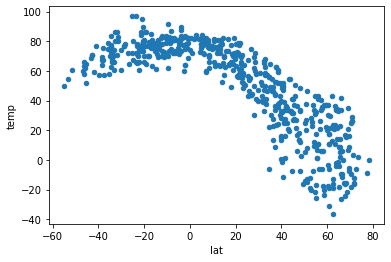

In [6]:
df.plot(kind='scatter',x="lat",y="temp")
plt.show()

#### Latitude vs. Humidity Plot

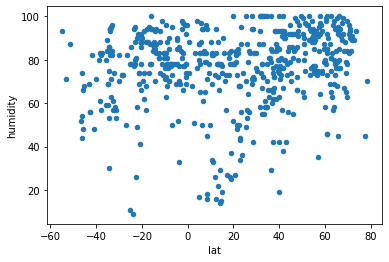

In [24]:
df.plot(kind='scatter',x="lat",y="humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

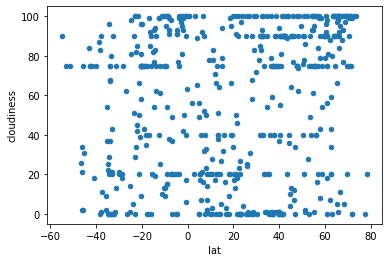

In [8]:
df.plot(kind='scatter',x="lat",y="cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

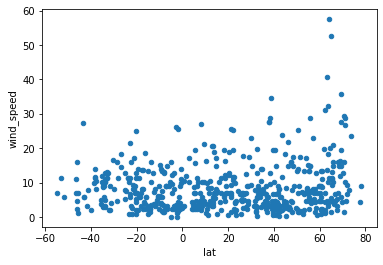

In [9]:
df.plot(kind='scatter',x="lat",y="wind_speed")
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
north=df.where(df["lat"]>=0).dropna()
south=df.where(df["lat"]>=0).dropna()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r_value is -0.8441188004717194


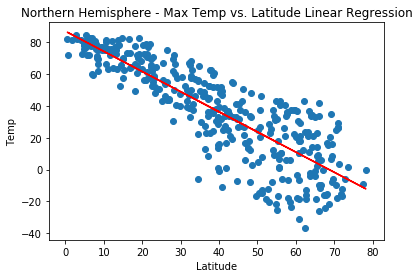

In [12]:
(slope,intercept,r_value,_,_)=linregress(north['lat'],north['temp'])
print(f'The r_value is {r_value}')
fit=slope*north['lat']+intercept
fig, ax= plt.subplots()
ax.plot(north['lat'],fit,c='r')
ax.scatter(north['lat'],north['temp'])
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r_value is -0.8441188004717194


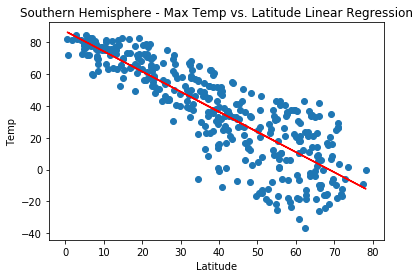

In [13]:
(slope,intercept,r_value,_,_)=linregress(south['lat'],south['temp'])
print(f'The r_value is {r_value}')
fit=slope*south['lat']+intercept
fig, ax= plt.subplots()
ax.plot(south['lat'],fit,c='r')
ax.scatter(north['lat'],north['temp'])
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_value is 0.3140623438604914


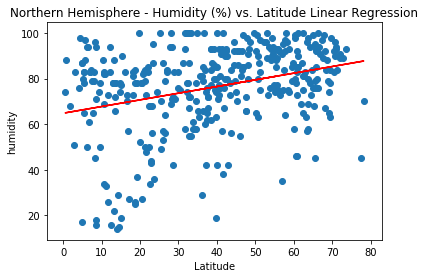

In [14]:
(slope,intercept,r_value,_,_)=linregress(north['lat'],north['humidity'])
print(f'The r_value is {r_value}')
fit=slope*north['lat']+intercept
fig, ax= plt.subplots()
ax.plot(north['lat'],fit,c='r')
ax.scatter(north['lat'],north['humidity'])
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_value is 0.3140623438604914


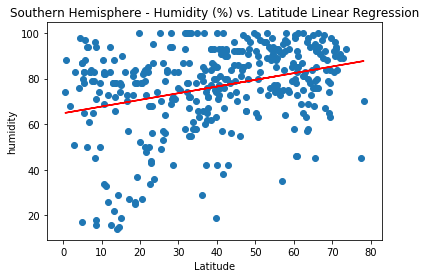

In [15]:
(slope,intercept,r_value,_,_)=linregress(south['lat'],south['humidity'])
print(f'The r_value is {r_value}')
fit=slope*south['lat']+intercept
fig, ax= plt.subplots()
ax.plot(south['lat'],fit,c='r')
ax.scatter(north['lat'],north['humidity'])
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_value is 0.35510017146705575


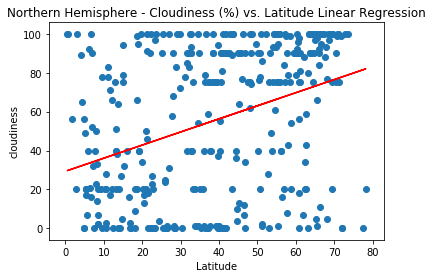

In [16]:
(slope,intercept,r_value,_,_)=linregress(north['lat'],north['cloudiness'])
print(f'The r_value is {r_value}')
fit=slope*north['lat']+intercept
fig, ax= plt.subplots()
ax.plot(north['lat'],fit,c='r')
ax.scatter(north['lat'],north['cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_value is 0.35510017146705575


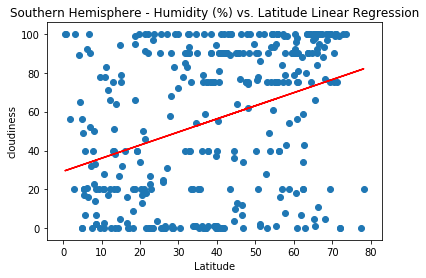

In [17]:
(slope,intercept,r_value,_,_)=linregress(south['lat'],south['cloudiness'])
print(f'The r_value is {r_value}')
fit=slope*south['lat']+intercept
fig, ax= plt.subplots()
ax.plot(south['lat'],fit,c='r')
ax.scatter(north['lat'],north['cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_value is 0.15870773503953442


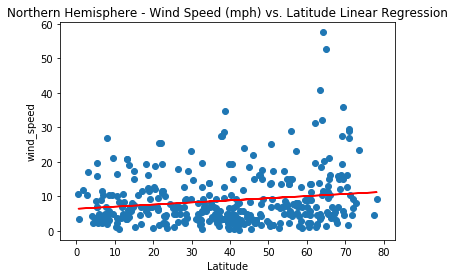

In [18]:
(slope,intercept,r_value,_,_)=linregress(north['lat'],north['wind_speed'])
print(f'The r_value is {r_value}')
fit=slope*north['lat']+intercept
fig, ax= plt.subplots()
ax.plot(north['lat'],fit,c='r')
ax.scatter(north['lat'],north['wind_speed'])
plt.xlabel('Latitude')
plt.ylabel('wind_speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_value is 0.15870773503953442


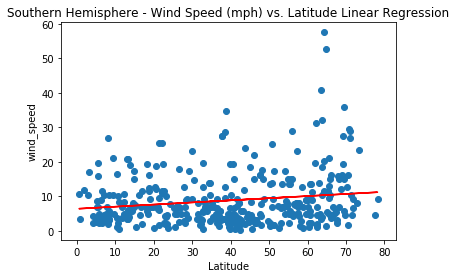

In [19]:
(slope,intercept,r_value,_,_)=linregress(south['lat'],south['wind_speed'])
print(f'The r_value is {r_value}')
fit=slope*south['lat']+intercept
fig, ax= plt.subplots()
ax.plot(south['lat'],fit,c='r')
ax.scatter(north['lat'],north['wind_speed'])
plt.xlabel('Latitude')
plt.ylabel('wind_speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()